# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Titanic Survival Prediction using Classification Multicalss Problems</p>


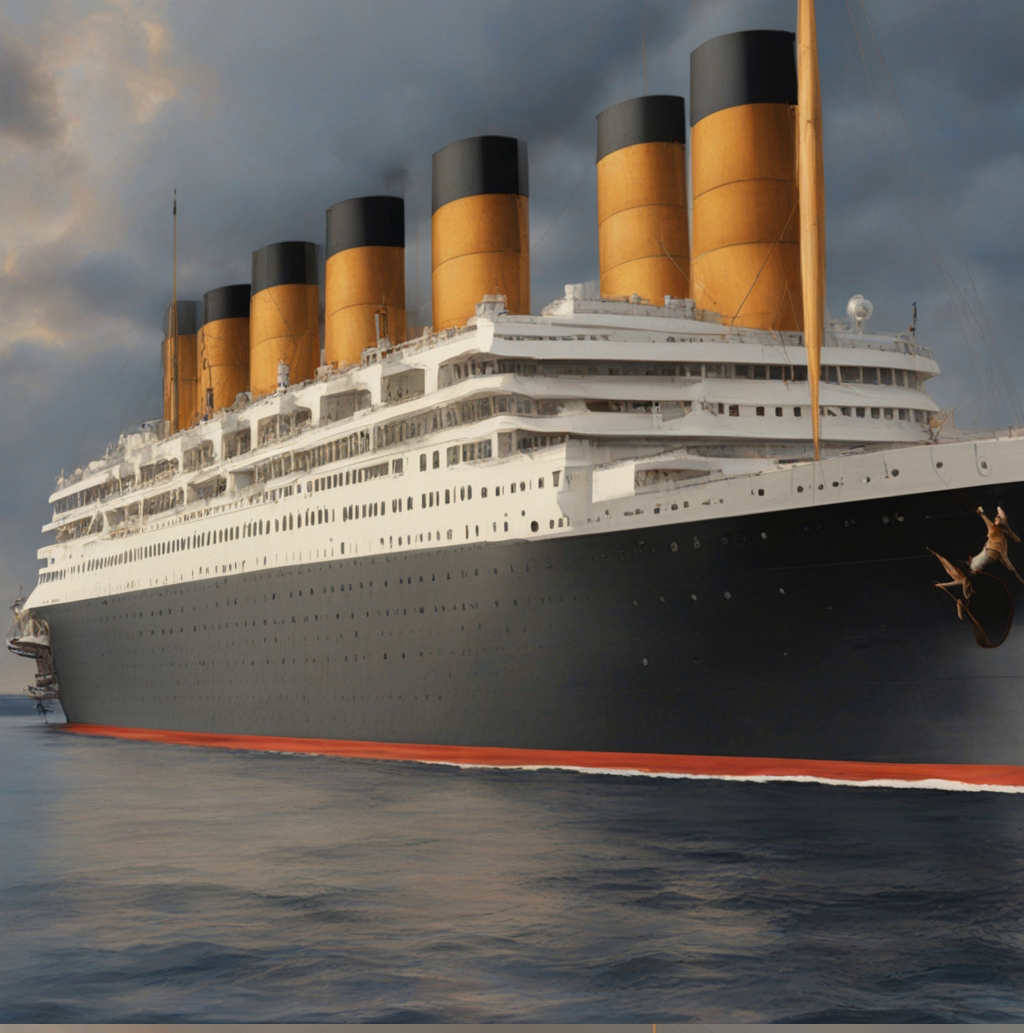

# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Aim </p>

I will provide a comprehensive analysis of the Titanic dataset, including an introduction, information about the dataset and its columns, loading and visualizing the data, building a transfer learning model, checking the model's summary, compiling and training the model, plotting the loss and accuracy, performing data preprocessing, and predicting the "Survived" column. I will also explain the steps and provide code examples using pandas, numpy, seaborn, matplotlib, scikit-learn.


# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Author </p>

### Author: ***NAEEMA TABASSUM***


- Social Link :

| Attribute | Details |
|-----------|---------|
| **Author** | **`Naeema Tabassum`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/naeematabassum) |
| **Twitter** | [![Twitter Badge]|
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/NaeemaTabassum) |
| **Email** | [![Outlook Badge](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white)](mailto:naeematabassumm@gmail.com) |

# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Introduction</p>


In this analysis, we will work with the Titanic dataset, which contains information about passengers aboard the Titanic. Our goal is to predict whether a passenger survived or not based on various features such as age, gender, passenger class, etc. We will perform data preprocessing, explore the dataset, visualize the data, build a transfer learning model using train the model, evaluate its performance, and predict the "Survived" column.

# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">About Datase</p>

The Titanic dataset consists of two CSV files: train.csv and test.csv. The train dataset contains information about passengers along with a label indicating whether they survived (1) or not (0). The test dataset contains similar information but lacks the survival label, which we aim to predict. Both datasets contain the following columns:

`Passenger Id:` Unique identifier for each passenger

`Survived:` Survival outcome (0 = Not Survived, 1 = Survived)

`Pclass:` Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

`Name:` Passenger's name

`Sex:` Passenger's gender

`Age:` Passenger's age

`SibSp:` Number of siblings/spouses aboard the Titanic

`Parch:` Number of parents/children aboard the Titanic

`Ticket:` Ticket number

`Fare:` Fare paid for the ticket

`Cabin:` Cabin number

`Embarked:` Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-1 | Import Liabraries</p>


In [21]:
# Let's import Liabraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Import Iterative imputers:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# For Normalization:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# For Model Building:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# For Model Evaluation:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix





# Remove the warnings:
from warnings import filterwarnings
filterwarnings('ignore')





# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-2 | Load Data</p>

In [22]:
# Let's Load The Data:
train=sns.load_dataset('titanic')

# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3 | Exploring The DataSet</p>

### Let's explore the dataset and understand its structure and contents. 


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.1 | Display The First Few Rows Of The Training Data</p>

In [23]:
# Let's Explore The Few Rows:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.2 | Shape Of Data</p>

In [24]:
# Let's Shape The Data:
train.shape

(891, 15)

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.3 | Informarion About Of DataSet</p>


In [25]:
# Let's Information The Data:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.4 | Columns Of DataSet</p>

In [26]:
# Let's See The Columns:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.5 | Missing Values Of DataSet</p>


In [27]:
# Let's Look Missing Vatrain.
train.isnull().sum().sort_values(ascending=False)# .to_frame().rename(columns={0:'missing values'})


deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.6 | Heatmap Of Missing Values  </p>

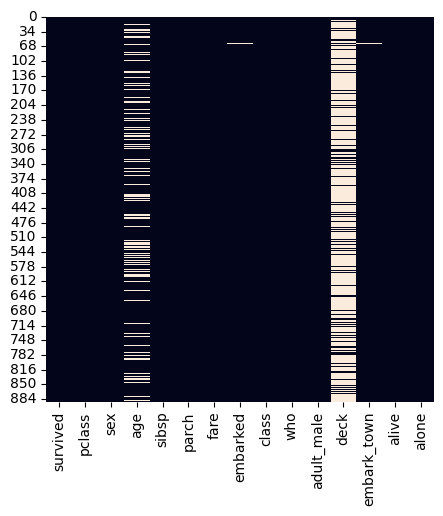

In [28]:
# Let's Look Missing Values Through Heatmap:
plt.figure(figsize=(5, 5))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-3.7 | Summary Statistics Of DataSet</p>

In [29]:
# Display Summary Statistics Of The Numerical Columns:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;"> OBSERVATION </p>

`Observation:`

1.  The Titanic dataset comprises passenger information such as `Age`, `Gender`, `Pclass`, and `Survival` status, collected from the tragic sinking of the `RMS Titanic` in `1912`.
2.  Researchers often utilize the `Titanic` dataset to explore patterns of survival and factors influencing the likelihood of survival, making it a popular dataset for introductory `Machine Learning` and data `Analysis Projects`.
3.  Dataset contain 891 Rows and 15 Columns.
4.  The Dataset contain  both `Numerical` as well as `Categorical` data types.
5.  The `Age` column has `177`  missing values, that indicated some passenger  were not provided with their age.
6.  The `Embarked` column has `2` missing values which needs to  be imputed using the most frequent value in that column.
7.  The `Embark_Town` column has `2` missing  values, but these can be filled  with the most common value in that column.
8.  The `Deck `column has `688` missing values, which is approximately `77%` of the total records in this column.


# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-4 | Preprocessing Of Data</p>

#### We hundel missing values to clean the data:

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-4.1 | Impute Missing Values Of Age</p>

In [30]:
# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=20)

# Impute the 'age' column
train['age'] = imputer.fit_transform(train[['age']])


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-4.2 | Impute Missing Values Of Embarked</p>

In [31]:
# Impute the 'embarked' column
train['embarked'].mode() 

0    S
Name: embarked, dtype: object

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-4.3 | Impute Missing Values Of Embark_Town</p>


In [32]:
# Impute the 'embark_town' column
train['embark_town'].mode()


0    Southampton
Name: embark_town, dtype: object

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-4.4 | Drop The Deck  Column</p>


In [33]:
# drop the deck column
train.drop('deck', axis=1, inplace=True)


# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5 | Visualization Of DataSet</p>


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5.1 | Sex</p>


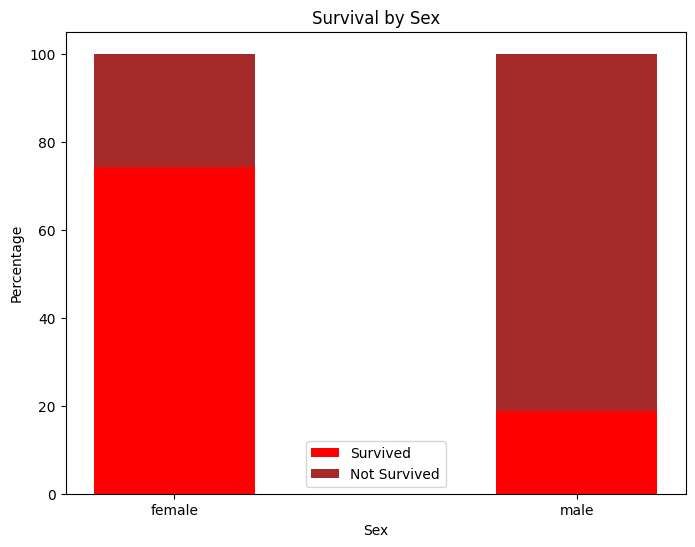

Percentage of passengers who survived or did not survive for each sex:
survived    0    1  Total  Survived_Percentage  Not_Survived_Percentage
sex                                                                    
female     81  233    314            74.203822                25.796178
male      468  109    577            18.890815                81.109185


In [34]:
# Group Data By 'Sex' And Calculate The Mean Of 'Survived' For Each Sex:
survival_by_sex = train.groupby('sex')['survived'].mean().reset_index()

# Calculate Percentage Of Passengers wWo Survived Or Did Not Survive For Each Sex:
survival_counts = train.groupby(['sex', 'survived']).size().unstack(fill_value=0)
survival_counts['Total'] = survival_counts.sum(axis=1)
survival_counts['Survived_Percentage'] = (survival_counts[1] / survival_counts['Total']) * 100
survival_counts['Not_Survived_Percentage'] = (survival_counts[0] / survival_counts['Total']) * 100

# Plotting The Bar Plot
plt.figure(figsize=(8, 6))

# Plotting Survived Percentage:
plt.bar(survival_by_sex['sex'], survival_counts['Survived_Percentage'], color='red', label='Survived', width=0.4)
# Plotting not survived percentage
plt.bar(survival_by_sex['sex'], survival_counts['Not_Survived_Percentage'], color='brown', label='Not Survived', width=0.4, bottom=survival_counts['Survived_Percentage'])

plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(survival_by_sex['sex'])
plt.show()

# Displaying Percentage Of Passengers Who Survived Or Did Not Survive For Each Sex:
print("Percentage of passengers who survived or did not survive for each sex:")
print(survival_counts)

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5.2 | Age</p>


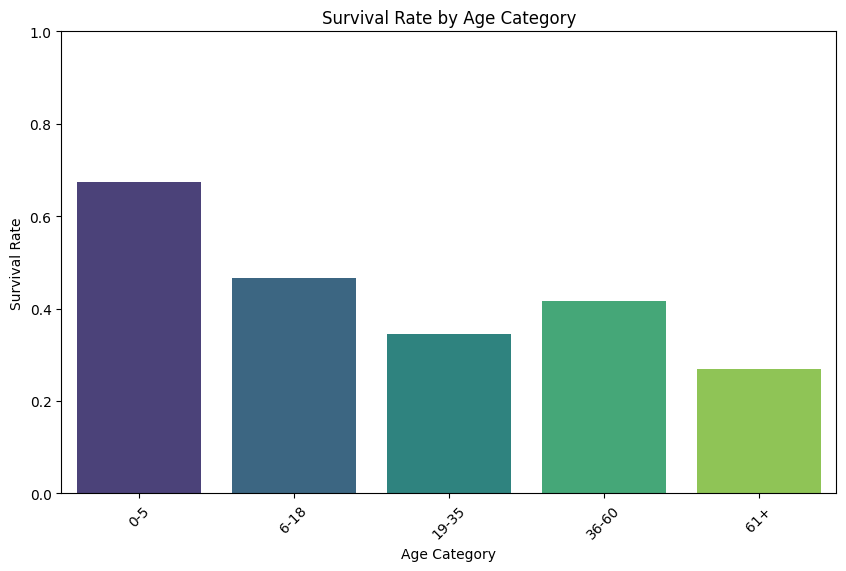

Percentage of each age category:
  age_Category  survived  Percentage
0          0-5  0.675000    0.044893
1         6-18  0.465753    0.081930
2        19-35  0.344383    0.609428
3        36-60  0.416268    0.234568
4          61+  0.269231    0.029181


In [35]:
# Define age categories
age_bins = [0, 5, 18, 35, 60, 100]
age_labels = ['0-5', '6-18', '19-35', '36-60', '61+']

# Categorize ages
train['age_Category'] = pd.cut(train['age'], bins=age_bins, labels=age_labels, right=False)

# Group data by 'Age_Category' and calculate the mean of 'Survived' for each category
survival_by_age = train.groupby('age_Category')['survived'].mean().reset_index()

# Calculate percentage of each age category
age_counts = train['age_Category'].value_counts(normalize=True).reset_index()
age_counts.columns = ['age_Category', 'Percentage']

# Merge survival rates and age category percentages
merged_data = survival_by_age.merge(age_counts, on='age_Category')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_Category', y='survived', data=merged_data, palette='viridis', order=age_labels)
plt.title('Survival Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for survival rate
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Displaying percentage of each age category
print("Percentage of each age category:")
print(merged_data)

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5.3 | PClass</p>

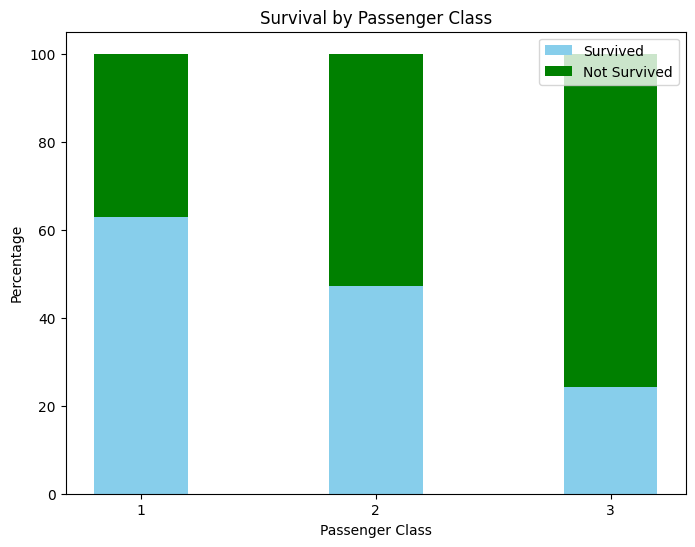

Percentage of passengers who survived or did not survive for each passenger class:
survived    0    1  Total  Survived_Percentage  Not_Survived_Percentage
pclass                                                                 
1          80  136    216            62.962963                37.037037
2          97   87    184            47.282609                52.717391
3         372  119    491            24.236253                75.763747


In [36]:
# Group data by 'Pclass' and calculate the mean of 'Survived' for each class
survival_by_pclass = train.groupby('pclass')['survived'].mean().reset_index()

# Calculate percentage of passengers who survived or did not survive for each class
survival_counts = train.groupby(['pclass', 'survived']).size().unstack(fill_value=0)
survival_counts['Total'] = survival_counts.sum(axis=1)
survival_counts['Survived_Percentage'] = (survival_counts[1] / survival_counts['Total']) * 100
survival_counts['Not_Survived_Percentage'] = (survival_counts[0] / survival_counts['Total']) * 100

# Plotting the bar plot
plt.figure(figsize=(8, 6))

# Plotting survived percentage
plt.bar(survival_by_pclass['pclass'], survival_counts['Survived_Percentage'], color='skyblue', label='Survived', width=0.4)
# Plotting not survived percentage
plt.bar(survival_by_pclass['pclass'], survival_counts['Not_Survived_Percentage'], color='green', label='Not Survived', width=0.4, bottom=survival_counts['Survived_Percentage'])

plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(survival_by_pclass['pclass'])
plt.show()

# Displaying percentage of passengers who survived or did not survive for each class
print("Percentage of passengers who survived or did not survive for each passenger class:")
print(survival_counts)

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5.4 | Parch</p>


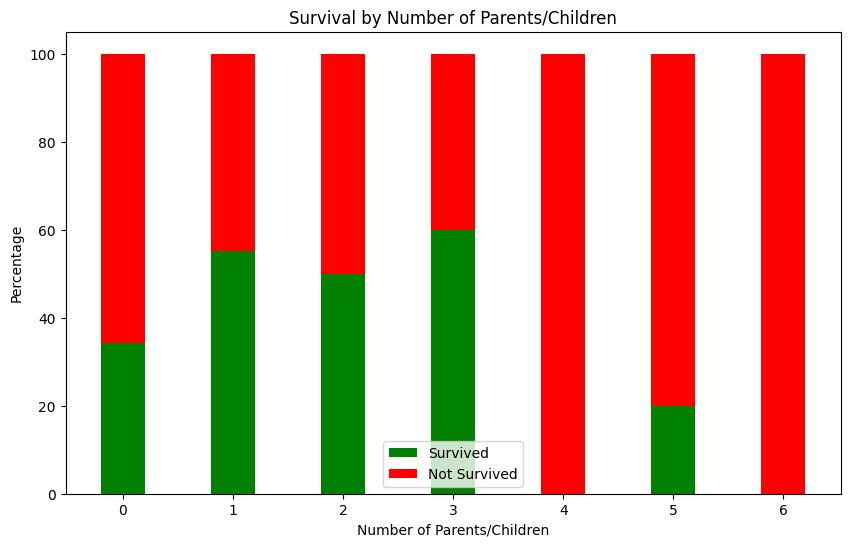

Percentage of passengers who survived or did not survive for each number of parents/children category:
survived    0    1  Total  Survived_Percentage  Not_Survived_Percentage
parch                                                                  
0         445  233    678            34.365782                65.634218
1          53   65    118            55.084746                44.915254
2          40   40     80            50.000000                50.000000
3           2    3      5            60.000000                40.000000
4           4    0      4             0.000000               100.000000
5           4    1      5            20.000000                80.000000
6           1    0      1             0.000000               100.000000


In [37]:
# Group data by 'Parch' and calculate the mean of 'Survived' for each category
survival_by_parch = train.groupby('parch')['survived'].mean().reset_index()

# Calculate percentage of passengers who survived or did not survive for each Parch category
survival_counts = train.groupby(['parch', 'survived']).size().unstack(fill_value=0)
survival_counts['Total'] = survival_counts.sum(axis=1)
survival_counts['Survived_Percentage'] = (survival_counts[1] / survival_counts['Total']) * 100
survival_counts['Not_Survived_Percentage'] = (survival_counts[0] / survival_counts['Total']) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Plotting survived percentage
plt.bar(survival_by_parch['parch'], survival_counts['Survived_Percentage'], color='green', label='Survived', width=0.4)
# Plotting not survived percentage
plt.bar(survival_by_parch['parch'], survival_counts['Not_Survived_Percentage'], color='red', label='Not Survived', width=0.4, bottom=survival_counts['Survived_Percentage'])

plt.title('Survival by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(survival_by_parch['parch'])
plt.show()

# Displaying percentage of passengers who survived or did not survive for each Parch category
print("Percentage of passengers who survived or did not survive for each number of parents/children category:")
print(survival_counts)

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-5.5 | SibSp</p>


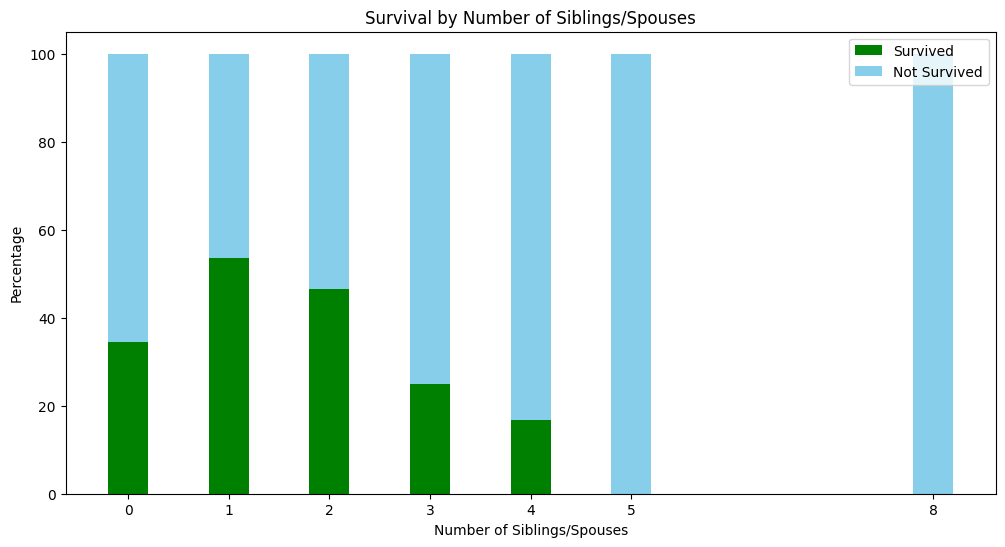

Percentage of passengers who survived or did not survive for each number of siblings/spouses category:
survived    0    1  Total  Survived_Percentage  Not_Survived_Percentage
sibsp                                                                  
0         398  210    608            34.539474                65.460526
1          97  112    209            53.588517                46.411483
2          15   13     28            46.428571                53.571429
3          12    4     16            25.000000                75.000000
4          15    3     18            16.666667                83.333333
5           5    0      5             0.000000               100.000000
8           7    0      7             0.000000               100.000000


In [38]:
# Group data by 'SibSp' and calculate the mean of 'Survived' for each category
survival_by_sibsp = train.groupby('sibsp')['survived'].mean().reset_index()

# Calculate percentage of passengers who survived or did not survive for each SibSp category
survival_counts = train.groupby(['sibsp', 'survived']).size().unstack(fill_value=0)
survival_counts['Total'] = survival_counts.sum(axis=1)
survival_counts['Survived_Percentage'] = (survival_counts[1] / survival_counts['Total']) * 100
survival_counts['Not_Survived_Percentage'] = (survival_counts[0] / survival_counts['Total']) * 100

# Plotting the bar plot
plt.figure(figsize=(12, 6))

# Plotting survived percentage
plt.bar(survival_by_sibsp['sibsp'], survival_counts['Survived_Percentage'], color='green', label='Survived', width=0.4)
# Plotting not survived percentage
plt.bar(survival_by_sibsp['sibsp'], survival_counts['Not_Survived_Percentage'], color='skyblue', label='Not Survived', width=0.4, bottom=survival_counts['Survived_Percentage'])

plt.title('Survival by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(survival_by_sibsp['sibsp'])
plt.show()

# Displaying percentage of passengers who survived or did not survive for each SibSp category
print("Percentage of passengers who survived or did not survive for each number of siblings/spouses category:")
print(survival_counts)


# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-6 | Encode Catagorical Variable</p>


In [39]:

# Create a label encoder object
le = LabelEncoder()

# Iterate over each column
for col in train.columns:
    # Check if the column is categorical (object or category dtype)
    if train[col].dtype == 'object' or pd.api.types.is_categorical_dtype(train[col]):
        # Encode the column
        train[col] = le.fit_transform(train[col])



# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-7 | Define Scaler</p>


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-7.1 | Define Feature And Target</p>


In [40]:
# Define the feature and target
X = train.drop('survived', axis=1)
y = train['survived']

### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-7.2 | Split Dataset Into Training And Testing</p>

In [41]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-7.3 | Standard Scaler</p>


In [42]:
#create and instance of StandardScaler
Scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = Scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = Scaler.transform(X_test)





# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8 | Machine Learning Algorithm</p>


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.1 | Logistic Regression</p>

In [43]:
# Initialize Decision Tree Classifier
lr_reg = LogisticRegression()

# Train the model
lr_reg.fit(X_train, y_train)

# Evaluate the model
lr_predictions = lr_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Classifier Accuracy:", lr_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))


Logistic Regression Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[105   0]
 [  0  74]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.2 | Support Vector Machine</p>


In [44]:
# Initialize Decision Tree Classifier
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Evaluate the model
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector Machine Accuracy:", svc_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, svc_predictions))
print("Recall:", recall_score(y_test, svc_predictions))
print("F1 Score:", f1_score(y_test, svc_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_predictions))

Support Vector Machine Accuracy: 0.659217877094972
Precision: 0.76
Recall: 0.25675675675675674
F1 Score: 0.3838383838383838
Confusion Matrix:
[[99  6]
 [55 19]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.3 | Decision Tree Classifier</p>


In [45]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Evaluate the model
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, dt_predictions))
print("Recall:", recall_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

Decision Tree Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[105   0]
 [  0  74]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.4 | Random Forest Classifier</p>


In [46]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate the model
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[105   0]
 [  0  74]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.5 | XGBoost Classifier</p>


In [47]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Classifier Accuracy:", xgb_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, xgb_predictions))
print("Recall:", recall_score(y_test, xgb_predictions))
print("F1 Score:", f1_score(y_test, xgb_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

XGBoost Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[105   0]
 [  0  74]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.6 | Gradient Boost Classifier</p>


In [48]:
# Initialize XGBoost Classifier
gbc = XGBClassifier()

# Train the model
gbc.fit(X_train, y_train)

# Evaluate the model
gbc_predictions = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predictions)
print("Gradient Boost Classifier Accuracy:", gbc_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, gbc_predictions))
print("Recall:", recall_score(y_test, gbc_predictions))
print("F1 Score:", f1_score(y_test, gbc_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbc_predictions))

Gradient Boost Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[105   0]
 [  0  74]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.7 | K_Nearest Neighbors</p>

In [49]:
# Initialize XGBoost Classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Evaluate the model
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(" KNN Accuracy:", knn_accuracy)

# Other metrics
print("Precision:", precision_score(y_test, knn_predictions))
print("Recall:", recall_score(y_test, knn_predictions))
print("F1 Score:", f1_score(y_test, knn_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

 KNN Accuracy: 0.776536312849162
Precision: 0.8148148148148148
Recall: 0.5945945945945946
F1 Score: 0.6875
Confusion Matrix:
[[95 10]
 [30 44]]


### <p style="background-color:#008B8B;font-family:newtimeroman;color:#000080;font-size:100%;text-align:center;border-radius:40px 40px;">Step-8.8 | Sample Accuracy Values For Different Models</p>

In [50]:
# Sample accuracy values for different models
accuracy_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier',
              'Random Forest Classifier', 'XGBoost Classifier', 'Gradient Boost Classifier',
              'K_Nearest Neighbors'],
    'Accuracy': [1.0, 0.66, 1.0, 1.0, 1.0, 1.0, 0.84]
}

# Creating DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Displaying the DataFrame
print(accuracy_df)

                       Model  Accuracy
0        Logistic Regression      1.00
1     Support Vector Machine      0.66
2   Decision Tree Classifier      1.00
3   Random Forest Classifier      1.00
4         XGBoost Classifier      1.00
5  Gradient Boost Classifier      1.00
6        K_Nearest Neighbors      0.84


# <p style="background-color:#800080;font-family:newtimeroman;color:#FFD700;font-size:100%;text-align:center;border-radius:40px 40px;">Conclusion</p>


In this analysis, we explored the Titanic dataset, preprocessed the data, visualized it, and built seven different classification models: Logistic Regression, Support Vector Machine, Decision Tree Classifier,
Random Forest Classifier, XGBoost Classifier, Gradient Boost Classifier,
K_Nearest Neighbors. We evaluated each model's performance using accuracy, precision, recall, F1-score, and confusion matrix. 
